In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [136]:
fuel = pd.read_csv("fuel.csv")
fuel.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [137]:
fuel = pd.read_csv('fuel.csv')

print(fuel['FUEL'].unique())

fuel['FUEL'] = fuel['FUEL'].map({
    'X': 0, 'Z': 1, 'E': 2, 'N': 3, 'D': 4
})

fuel['FUEL'] = fuel['FUEL'].fillna(-1)

print(fuel['FUEL'].unique()) 

print(fuel.head())

['X' 'Z' 'E' 'N' 'D']
[0 1 2 3 4]
   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

   FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0     0               9.2             6.7              8.1          35   
1     0               8.5             6.5              7.6          37   
2     1              12.2             7.4             10.0          28   
3     1              13.4             9.2             11.5          25   
4     0              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2      

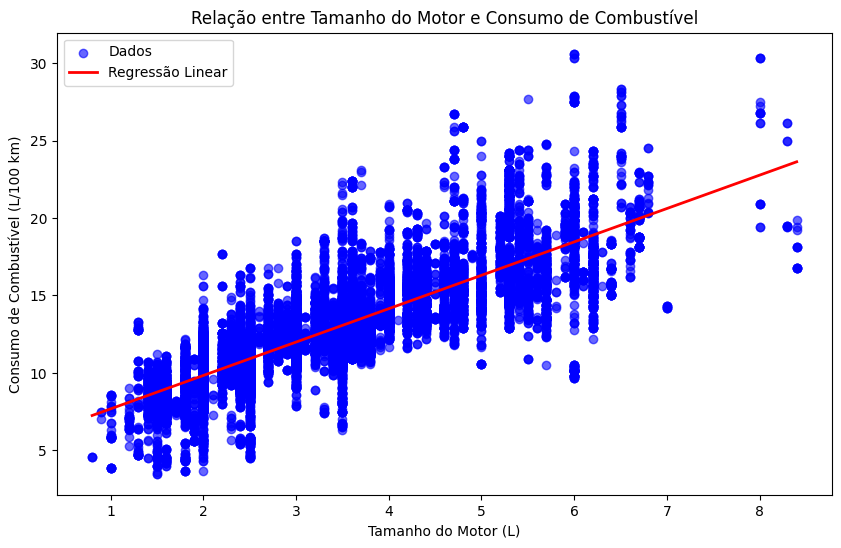

In [138]:
X = fuel[["ENGINE SIZE"]].values 
y = fuel["FUEL CONSUMPTION"].values 

modelo = LinearRegression()
modelo.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) 
y_pred = modelo.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color="blue", label="Dados")

plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title('Relação entre Tamanho do Motor e Consumo de Combustível')
plt.xlabel('Tamanho do Motor (L)')
plt.ylabel('Consumo de Combustível (L/100 km)')
plt.legend()

plt.show()

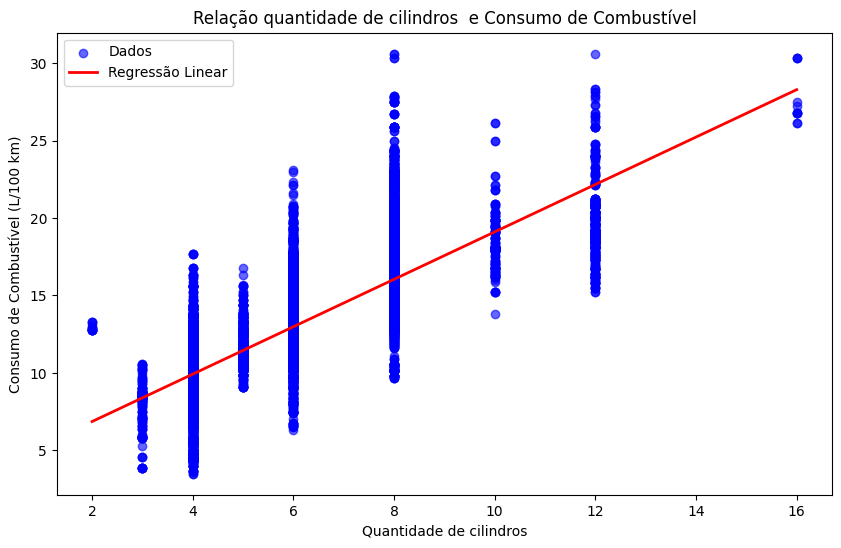

In [139]:
df = pd.read_csv('fuel.csv')

X = df[["CYLINDERS"]].values  
y = df["FUEL CONSUMPTION"].values  

modelo = LinearRegression()
modelo.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  
y_pred = modelo.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color="blue", label="Dados")

plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title('Relação quantidade de cilindros  e Consumo de Combustível')
plt.xlabel('Quantidade de cilindros')
plt.ylabel('Consumo de Combustível (L/100 km)')
plt.legend()

plt.show()


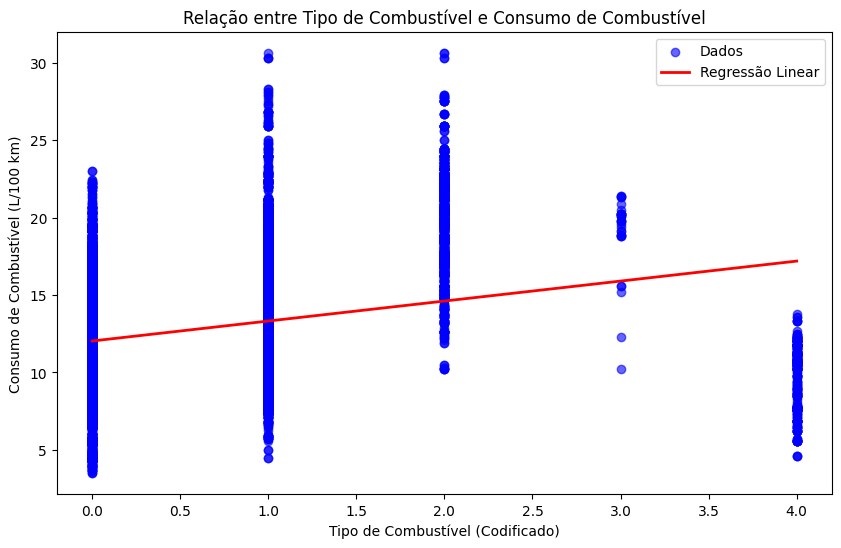

In [141]:
df = pd.read_csv("fuel.csv", encoding="utf-8")

df['FUEL'] = df['FUEL'].map({
    'X': 0, 'Z': 1, 'E': 2, 'N': 3, 'D': 4
})

df['FUEL'] = df['FUEL'].fillna(-1)

X = df[["FUEL"]].values  
y = df["FUEL CONSUMPTION"].values 

modelo = LinearRegression()
modelo.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = modelo.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color="blue", label="Dados")

plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title('Relação entre Tipo de Combustível e Consumo de Combustível')
plt.xlabel('Tipo de Combustível (Codificado)')
plt.ylabel('Consumo de Combustível (L/100 km)')
plt.legend()

plt.show()

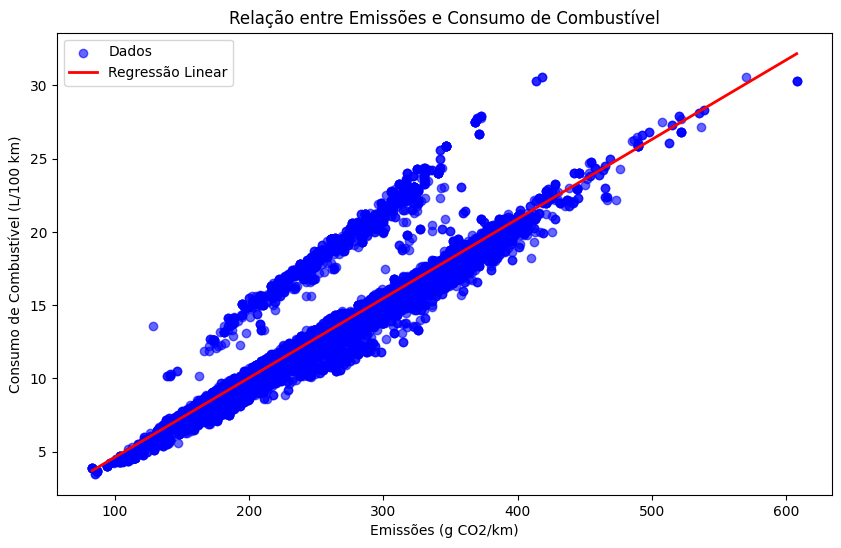

In [142]:
X = fuel[["EMISSIONS"]].values  
y = fuel["FUEL CONSUMPTION"].values  

modelo = LinearRegression()
modelo.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = modelo.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color="blue", label="Dados")

plt.plot(x_range, y_pred, color="red", linewidth=2, label="Regressão Linear")

plt.title('Relação entre Emissões e Consumo de Combustível')
plt.xlabel('Emissões (g CO2/km)')
plt.ylabel('Consumo de Combustível (L/100 km)')
plt.legend()

plt.show()

In [145]:
def carregar_dados():
    return pd.read_csv('fuel.csv')

df = carregar_dados()

y = df['COMB (L/100 km)']
X = df[['ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL']]

df['FUEL'] = df['FUEL'].map({
    'X': 0, 'Z': 1, 'E': 2, 'N': 3, 'D': 4
})

preprocessador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['TRANSMISSION', 'FUEL']),
        ('num', StandardScaler(), ['ENGINE SIZE', 'CYLINDERS'])
    ])

pipelines = {
    'Linear Regression': Pipeline(steps=[
        ('preprocessador', preprocessador),
        ('modelo', LinearRegression())
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessador', preprocessador),
        ('modelo', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting': Pipeline(steps=[
        ('preprocessador', preprocessador),
        ('modelo', GradientBoostingRegressor(random_state=42))
    ])
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist_rf = {
    'modelo__n_estimators': np.arange(50, 200, 50),
    'modelo__max_depth': [None, 10, 20, 30],
    'modelo__min_samples_split': [2, 5, 10]
}

param_dist_gb = {
    'modelo__n_estimators': np.arange(50, 200, 50),
    'modelo__learning_rate': [0.01, 0.1, 0.2],
    'modelo__max_depth': [3, 5, 7]
}

random_search_rf = RandomizedSearchCV(estimator=pipelines['Random Forest'], param_distributions=param_dist_rf, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search_gb = RandomizedSearchCV(estimator=pipelines['Gradient Boosting'], param_distributions=param_dist_gb, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=1)

print("Ajustando Random Forest...")
random_search_rf.fit(X_train, y_train)

print("Ajustando Gradient Boosting...")
random_search_gb.fit(X_train, y_train)

print("\nMelhores parâmetros para Random Forest:")
print(random_search_rf.best_params_)
print(f"Melhor pontuação: {random_search_rf.best_score_}")

print("\nMelhores parâmetros para Gradient Boosting:")
print(random_search_gb.best_params_)
print(f"Melhor pontuação: {random_search_gb.best_score_}")

Ajustando Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ajustando Gradient Boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Melhores parâmetros para Random Forest:
{'modelo__n_estimators': np.int64(100), 'modelo__min_samples_split': 5, 'modelo__max_depth': 30}
Melhor pontuação: 0.8768045519548548

Melhores parâmetros para Gradient Boosting:
{'modelo__n_estimators': np.int64(150), 'modelo__max_depth': 7, 'modelo__learning_rate': 0.1}
Melhor pontuação: 0.8726589133782372
